<a href="https://colab.research.google.com/github/amirhoseinoveis/Adversarial-attack/blob/main/add_XAI_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

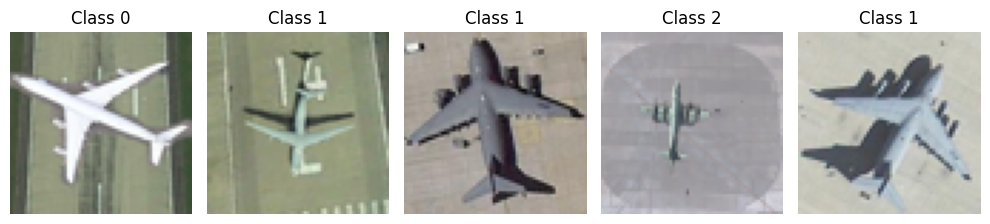

In [71]:
import os
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

Dataset = 'MTARSI'  # Options: 'MSTAR' or 'MTARSI'

if Dataset == 'MSTAR':
    url = 'https://github.com/amirhoseinoveis/GradCAM-with-MSTAR/raw/refs/heads/main/mstar_3cl_32by32.npz'
    path = '/content/mstar_3cl_32by32.npz'
    os.system(f'wget {url} -O {path}')

    with np.load(path) as data_mstar:
        x_train = np.repeat(data_mstar['x_train'], 3, axis=-1)
        y_train = data_mstar['y_train']
        x_test = np.repeat(data_mstar['x_test'], 3, axis=-1)
        y_test = data_mstar['y_test']
    num_classes=1+y_test.max()
    labels = [str(i) for i in range(num_classes)]

elif Dataset == 'MTARSI':
    # Download and unzip
    url = 'https://raw.githubusercontent.com/amirhoseinoveis/Adversarial-attack/main/airplanes.zip'
    path = '/content/airplanes.zip'
    extract_to = '/content/airplanes'
    os.system(f'wget {url} -O {path}')
    os.system(f'unzip -q {path} -d {extract_to}')

    # Load image paths and labels
    root = os.path.join(extract_to, 'airplanes')
    image_paths = glob(f'{root}/*/*.jpg') + glob(f'{root}/*/*.png')
    labels = [int(os.path.basename(os.path.dirname(p))) for p in image_paths]

    # Image loading function
    def load_images(image_paths, size=(64, 64)):
        X = []
        for path in image_paths:
            img = Image.open(path).convert('RGB').resize(size)
            X.append(np.array(img))
        return np.array(X)

    # Load and prepare data
    X = load_images(image_paths)
    X = X / 255.0
    num_classes = len(set(labels))

    x_train, x_test, y_train, y_test = train_test_split(
        X, labels, test_size=0.2, random_state=42
    )

# Show 5 images from x_train
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i+5].squeeze(), cmap='gray' if x_train[i+5].shape[-1] == 1 else None)
    plt.title(f"Class {y_train[i+5]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv1 (Conv2D)                  │ (None, 64, 64, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 32, 32, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 16, 16, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Vectorize (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ FC (Dense)                      │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,179 (188.20 KB)

 Trainable params: 48,179 (188.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - acc: 0.4670 - loss: 1.0639 - val_acc: 0.4671 - val_loss: 1.0559
Epoch 2/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - acc: 0.5258 - loss: 1.0263 - val_acc: 0.4671 - val_loss: 1.0593
Epoch 3/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.4951 - loss: 1.0351 - val_acc: 0.4671 - val_loss: 1.0371
Epoch 4/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - acc: 0.5162 - loss: 1.0008 - val_acc: 0.4671 - val_loss: 1.0170
Epoch 5/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.5519 - loss: 0.9474 - val_acc: 0.5269 - val_loss: 0.9425
Epoch 6/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.6297 - loss: 0.8642 - val_acc: 0.5629 - val_loss: 0.8814
Epoch 7/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - acc: 0.7010 - loss: 0.7558 - val_acc: 0.6168 - val_loss: 0.7899
Epoch 8/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - acc: 0.7550 - loss: 0.6534 - val_acc: 0.6347 - val_loss: 0.8532
Epoch 9/30
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.707

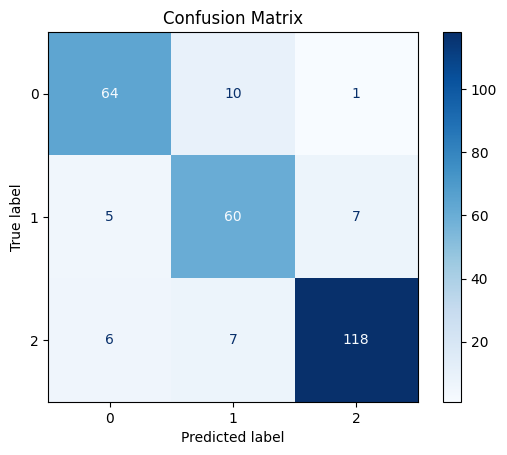

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        75
           1       0.78      0.83      0.81        72
           2       0.94      0.90      0.92       131

    accuracy                           0.87       278
   macro avg       0.86      0.86      0.86       278
weighted avg       0.87      0.87      0.87       278



In [72]:
from tensorflow.keras.layers import  Input, Activation, Flatten, Conv2D, MaxPooling2D,  Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy

from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential

inputs = Input(shape=(x_train.shape[1],x_train.shape[2],3),name="Input")
x = Conv2D(128, 3, activation="relu", padding='same',name='Conv1')(inputs)
x = MaxPooling2D(2,name='Pool1')(x)
x = Conv2D(32, 3, activation="relu",padding='same',name='Conv3')(x)
x = MaxPooling2D(2,name='Pool2')(x)
x = Conv2D(16, 3, activation="relu",padding='same',name='Conv4')(x)
x = MaxPooling2D(2,name='Pool3')(x)

x = Flatten(name='Vectorize')(x)
outputs= Dense(3,name='FC',activation="softmax")(x)
model = Model(inputs, outputs)
model.compile(optimizer=Adam(learning_rate=0.001), loss=CategoricalCrossentropy(), metrics=['acc'])
model.summary()



hist = model.fit(
x_train,
to_categorical(y_train, 3),  # One-hot encode your labels
batch_size=32,
epochs=30,
validation_split=0.15,
shuffle='off',
)
y_hat=model.predict(x_test)#test the model, prob.
#classification_report
CM=confusion_matrix(y_true=y_test,y_pred=y_hat.argmax(1))


# Display
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.unique(labels))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_true=y_test,y_pred=y_hat.argmax(1)))


In [76]:
import tensorflow as tf
import subprocess, sys




attack = 'cw'  # Options: 'fgsm' or 'cw'
if attack == 'fgsm':
  def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
      tape.watch(input_image)
      prediction = model(input_image)
      loss = loss_object(input_label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

  loss_object = tf.keras.losses.CategoricalCrossentropy()


  eps = 0.05
  perturbations = create_adversarial_pattern(
      tf.convert_to_tensor(x_test, dtype=tf.float32),
      tf.convert_to_tensor(y_test, dtype=tf.float32)
  )
  x_adv = x_test + eps * (0.5 + perturbations * 0.5)
  x_adv = tf.clip_by_value(x_adv, 0, 1).numpy()

elif attack == 'cw':
    try:
        from art.estimators.classification import TensorFlowV2Classifier
        from art.attacks.evasion import CarliniL2Method
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "adversarial-robustness-toolbox"])
        from art.estimators.classification import TensorFlowV2Classifier
        from art.attacks.evasion import CarliniL2Method

    classifier = TensorFlowV2Classifier(
        model=model,
        nb_classes=num_classes,
        input_shape=x_train.shape[1:],  # (H, W, C)
        loss_object=CategoricalCrossentropy(from_logits=False),  # because model outputs softmax
        clip_values=(0.0, 1.0),          # important: set input range
        preprocessing_defences=None,
        postprocessing_defences=None,
        channels_first=False,
        preprocessing=(0.0, 1.0),       # no normalization shift/scale
    )

    # CW attack
    cw = CarliniL2Method(
        classifier=classifier,
        targeted=False,
        max_iter=10,           # 10 is usually too low
        learning_rate=0.01,
        initial_const=0.01,     # optional: can be tuned
        binary_search_steps=5,    # optional: increases success rate
    )
    x_adv = cw.generate(x=x_test)










C&W L_2:   0%|          | 0/278 [00:00<?, ?it/s]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


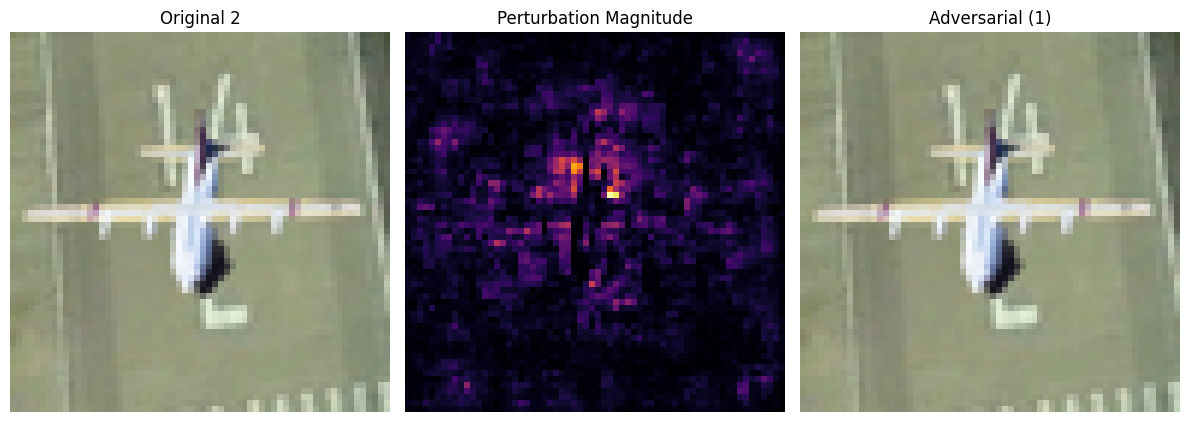

In [102]:

adv_pred = model.predict(x_adv)
adv_class = np.argmax(adv_pred,axis=1)
# Visualization
plt.figure(figsize=(12, 12))

ind=0
plt.subplot(1, 3, 1)
plt.title(f"Original {y_test[ind]}")
plt.imshow(x_test[ind].squeeze(), cmap='gray' if x_test.shape[-1] == 1 else None)
plt.axis('off')

plt.subplot(1, 3, 2)
pert_magnitude = np.linalg.norm(x_test[ind] - x_adv[ind], axis=-1)
plt.imshow(pert_magnitude, cmap='inferno')  # or 'gray', 'hot'
plt.title("Perturbation Magnitude")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Adversarial ({adv_class[ind]})")
plt.imshow(x_adv[0].squeeze(), cmap='gray' if original.shape[-1] == 1 else None)
plt.axis('off')

plt.tight_layout()
plt.show()

In [80]:
!pip install lime
!pip install shap
import lime
import shap
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
from skimage.segmentation import mark_boundaries



# XAI_method #options: 'GradCAM', "LIME" and "SHAP"

# XAI_method='GradCAM':
def get_gradcam_heatmap(model, image, class_idx, layer_name):
    grad_model = Model(
        inputs=[model.inputs],
        outputs=[model.get_layer(layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(image, axis=0))
        loss = predictions[:, class_idx]

    # Gradient of the output neuron (target class) with respect to conv layer output
    grads = tape.gradient(loss, conv_outputs)[0]

    # Mean intensity of the gradient over each feature map channel
    weights = tf.reduce_mean(grads, axis=(0, 1))

    # Weighted sum of feature maps
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs[0]), axis=-1)

    # Apply ReLU
    cam = tf.nn.relu(cam).numpy()

    # Normalize between 0 and 1
    cam -= cam.min()
    cam /= cam.max() + 1e-8

    return cam
def show_gradcam_overlay(input_image, heatmap, true_class=None, pred_class=None, alpha=0.5):
    """
    Displays original input, Grad-CAM heatmap, and overlay with class info.

    Args:
        input_image (np.array): Input image (H, W, 1) or (H, W, 3)
        heatmap (np.array): Grad-CAM heatmap (range 0–1)
        true_class (str or int): True class label (optional)
        pred_class (str or int): Predicted class label (optional)
        alpha (float): Blending factor for overlay
    """
    # Scale and resize heatmap
    heatmap = np.uint8(255 * heatmap)
    heatmap_resized = cv2.resize(heatmap, (input_image.shape[1], input_image.shape[0]))
    heatmap_colored_bgr = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored_bgr, cv2.COLOR_BGR2RGB)

    # Prepare input image and convert to 3-channel RGB
    if input_image.shape[-1] == 1:
        img_uint8 = np.uint8(255 * input_image.squeeze())
        input_image_rgb = cv2.cvtColor(img_uint8, cv2.COLOR_GRAY2BGR)
        input_display = input_image.squeeze()
        cmap = 'gray'
    elif input_image.shape[-1] == 3:
        input_image_rgb = np.uint8(255 * input_image)
        input_display = input_image
        cmap = None
    else:
        raise ValueError("Input image must have 1 or 3 channels.")

    # Create overlay image
    overlay_bgr = cv2.addWeighted(heatmap_colored_bgr, alpha, input_image_rgb, 1 - alpha, 0)
    overlay = cv2.cvtColor(overlay_bgr, cv2.COLOR_BGR2RGB)

    # Build figure title
    title_text = "Grad-CAM Visualization"
    if true_class is not None or pred_class is not None:
        title_text += f"\nTrue: {true_class} | Predicted: {pred_class}"

    # Plot
    plt.figure(figsize=(15, 5))
    plt.suptitle(title_text, fontsize=14)

    plt.subplot(1, 3, 1)
    plt.title("Original")
    plt.imshow(input_display, cmap=cmap)
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Grad-CAM Heatmap")
    plt.imshow(heatmap_colored)
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title("Grad-CAM Overlay")
    plt.imshow(overlay)
    plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # leave space for suptitle
    plt.show()

# elif XAI_method=="LIME":
segmenter = SegmentationAlgorithm('slic', n_segments=100, compactness=1, sigma=1)
# elif XAI_method=="SHAP":
def f(x):
    tmp = x.copy()
    return model(tmp)
masker_blur = shap.maskers.Image("blur(32,32)", x_test[0].shape)
explainer_SHAP = shap.Explainer(f, masker_blur, output_names=list(range(3)))



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=daab6567a5e9e3200e072dd9aafa51d35d53bfcbd4b8b1fa148077d7d5073e73
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [103]:
import cv2


# Select the last conv layer (modify as needed)
last_conv_layer = "Conv4"
# Get heatmap
heatmap = get_gradcam_heatmap(model, x_test[ind], y_test[ind], last_conv_layer)
# =====================
explainer_LIME = lime_image.LimeImageExplainer()

explanation = explainer_LIME.explain_instance(x_test[ind],
                                         classifier_fn = model.predict,
                                         top_labels=1, hide_color=0, num_samples=10000, segmentation_fn=segmenter)

# ====================
shap_values = explainer_SHAP( x_test[ind:ind+1], max_evals=10000, batch_size=50 )



/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['Input']]
Received: inputs=Tensor(shape=(1, 64, 64, 3))
  warnings.warn(msg)


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


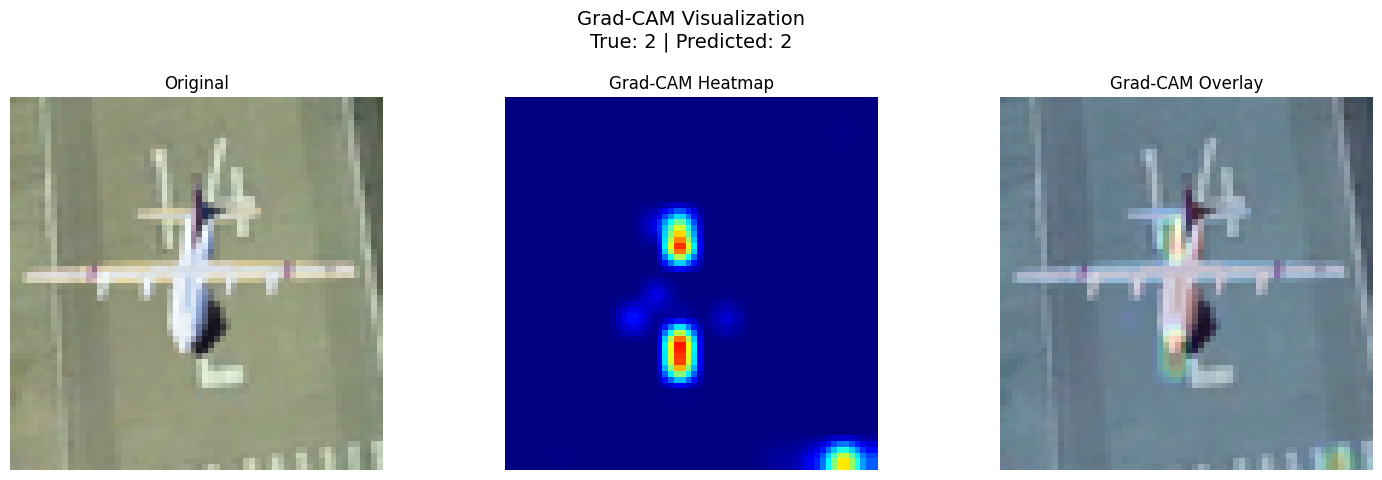

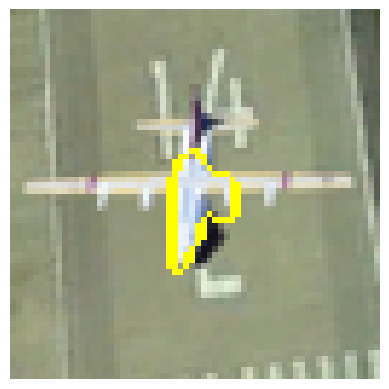

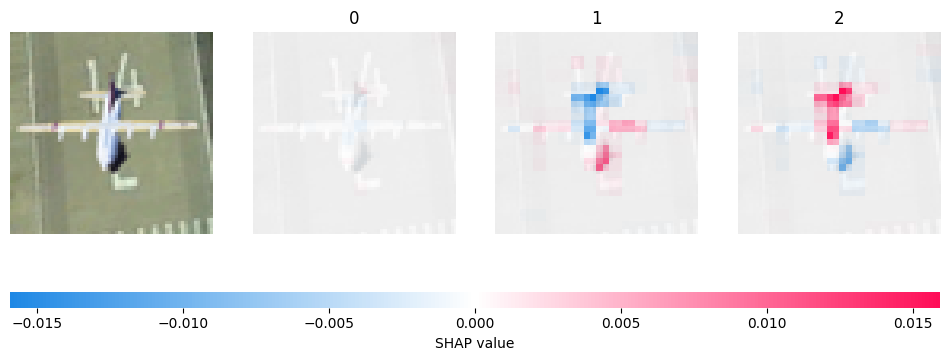

In [104]:
show_gradcam_overlay( x_test[ind], heatmap, true_class=y_test[ind], pred_class=model.predict( x_test[ind:ind+1]).argmax(1)[0],alpha=0.15)
# =====================

image, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                 positive_only=True,
                                 num_features=1,
                                 hide_rest=False,
                                 min_weight=0
                                )
plt.imshow(mark_boundaries(image, mask))
plt.axis('off')
plt.show()
# =====================

shap.image_plot(shap_values,labels=[0,1,2])


In [117]:
heatmap = get_gradcam_heatmap(model, x_adv[ind], adv_class[ind], last_conv_layer)
# =====================

explainer_LIME = lime_image.LimeImageExplainer()

explanation = explainer_LIME.explain_instance(x_adv[ind],
                                         classifier_fn = model.predict,
                                         top_labels=2, hide_color=0, num_samples=10000, segmentation_fn=segmenter)

# ====================
shap_values = explainer_SHAP( x_adv[ind:ind+1], max_evals=10000, batch_size=50 )


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['Input']]
Received: inputs=Tensor(shape=(1, 64, 64, 3))
  warnings.warn(msg)


  0%|          | 0/10000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

  0%|          | 0/9998 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


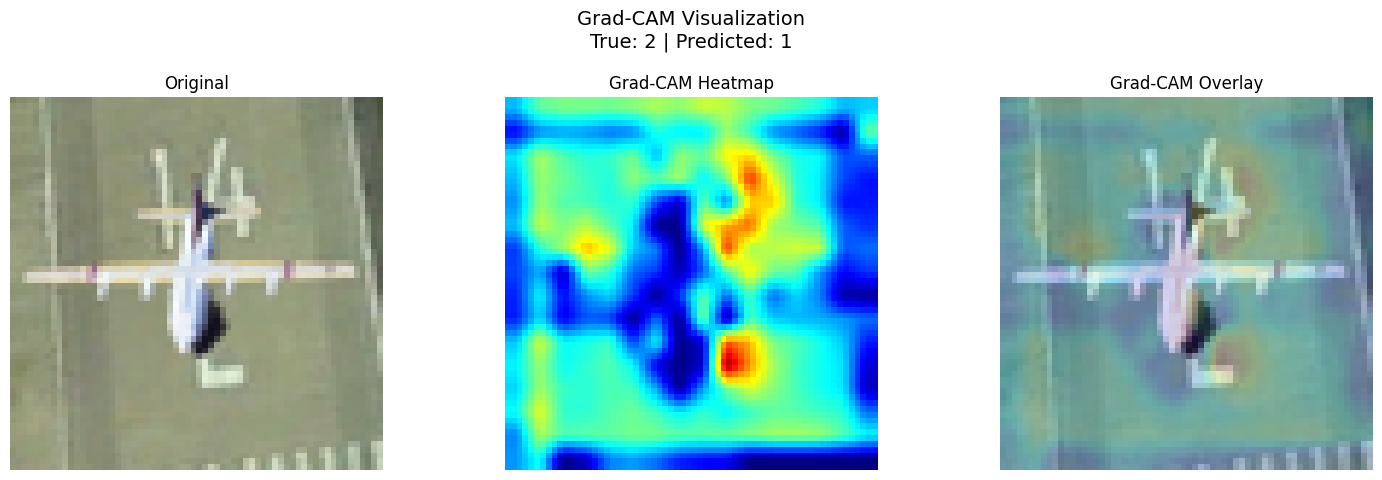

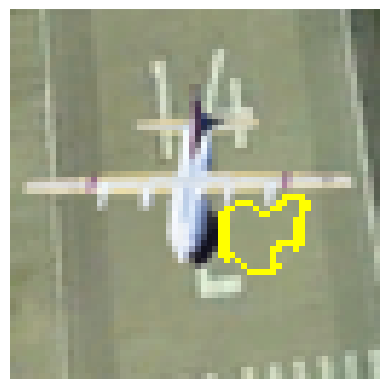

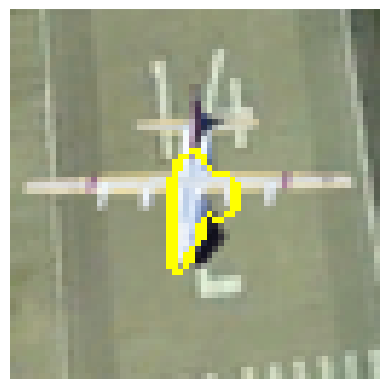

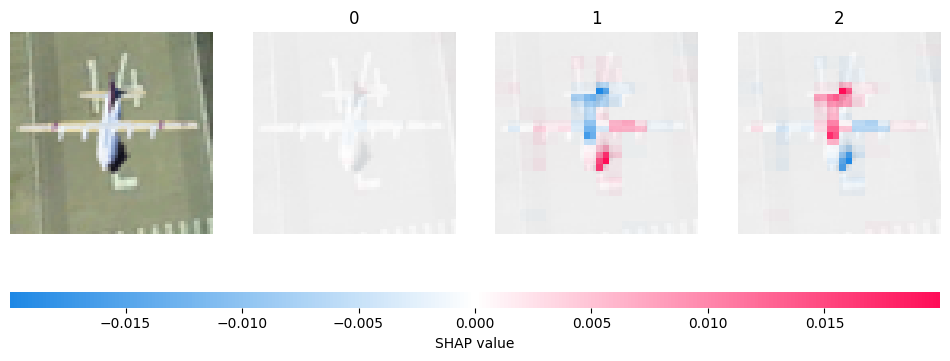

In [123]:
show_gradcam_overlay( x_adv[ind], heatmap, true_class=y_test[ind], pred_class=model.predict(x_adv[ind:ind+1]).argmax(1)[0],alpha=0.15)
# =====================

image, mask = explanation.get_image_and_mask(explanation.top_labels[0],
                                 positive_only=True,
                                 num_features=1,
                                 hide_rest=False,
                                 min_weight=0
                                )
plt.imshow(mark_boundaries(image, mask))
plt.axis('off')
plt.show()



image, mask = explanation.get_image_and_mask(2,
                                 positive_only=True,
                                 num_features=1,
                                 hide_rest=False,
                                 min_weight=0
                                )
plt.imshow(mark_boundaries(image, mask))
plt.axis('off')
plt.show()
# =====================

shap.image_plot(shap_values,labels=[0,1,2])


In [113]:
explanation.top_labels[0]

np.int64(1)

In [114]:
np.int64(1)

np.int64(1)